In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
N = 3
M = 3
V = 1
V2 = 0.1

states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

site_1 = N // 2
site_2 = site_1 + 1

same_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_1_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_2_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
entropy_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)

for i, mu in enumerate(mus):
    for j, J in enumerate(Js):
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

        P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
        d = len(degenerate_states)

        # Entanglement entropy (bipartition in the middle)
        entropies = [compute_entanglement_entropy(N, M, psi, cut_site=N // 2) for psi in degenerate_states]
        entropy_grid[i, j] = np.mean(entropies)
        
        # Correlation function
        op1 = single_site_number_operator(N, M, site_index=site_1, synth_level = 0, states=states)
        for synth_level in range(M):
            op2 = single_site_number_operator(N, M, site_index=site_2, synth_level = synth_level, states=states)
            
            if synth_level == 0:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                same_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
                
            elif synth_level == 1:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_1_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
            
            elif synth_level == 2:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_2_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)

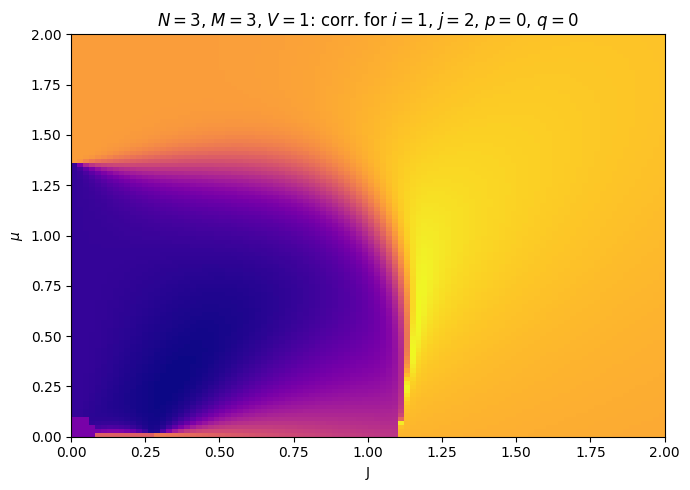

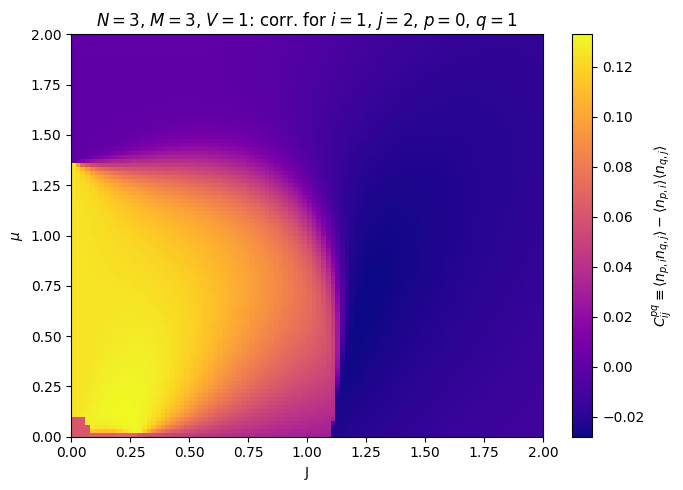

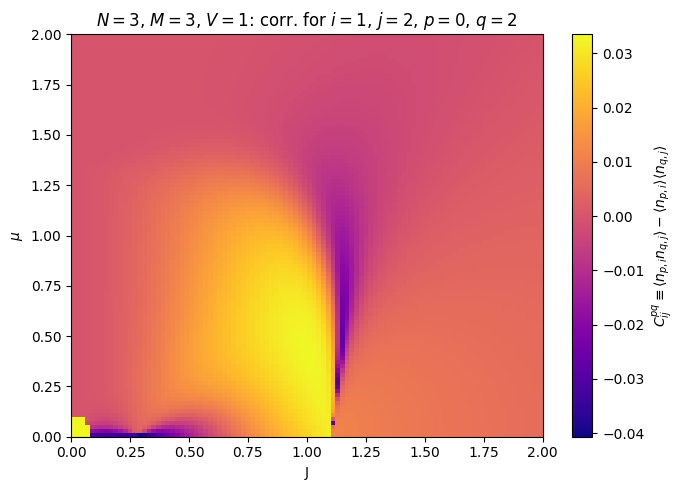

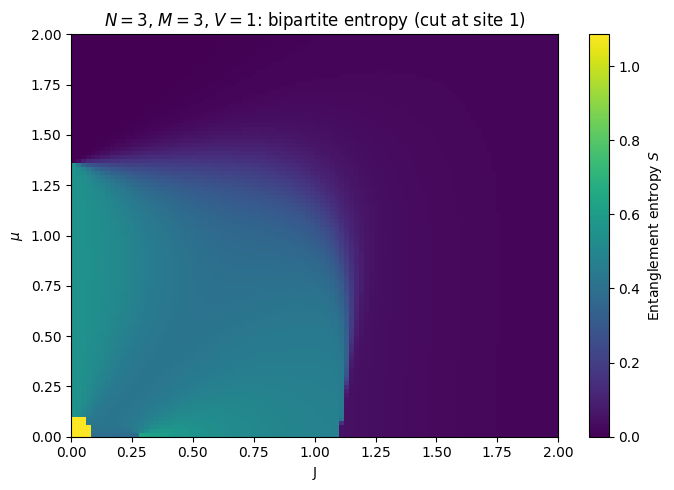

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    same_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={0}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_1_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={1}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_2_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={2}$")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    entropy_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='viridis'
)
fig.colorbar(c, ax=ax, label=r'Entanglement entropy $S$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: bipartite entropy (cut at site {N//2})")
plt.tight_layout()
plt.show()


In [6]:
N = 4
M = 3
V = 1
V2 = 0.1

states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

site_1 = N // 2
site_2 = site_1 + 1

same_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_1_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_2_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
entropy_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)

for i, mu in enumerate(mus):
    for j, J in enumerate(Js):
        hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2 = V2)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

        P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
        d = len(degenerate_states)

        # Entanglement entropy (bipartition in the middle)
        entropies = [compute_entanglement_entropy(N, M, psi, cut_site=N // 2) for psi in degenerate_states]
        entropy_grid[i, j] = np.mean(entropies)
        
        # Correlation function
        op1 = single_site_number_operator(N, M, site_index=site_1, synth_level = 0, states=states)
        for synth_level in range(M):
            op2 = single_site_number_operator(N, M, site_index=site_2, synth_level = synth_level, states=states)
            
            if synth_level == 0:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                same_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
                
            elif synth_level == 1:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_1_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
            
            elif synth_level == 2:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_2_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)

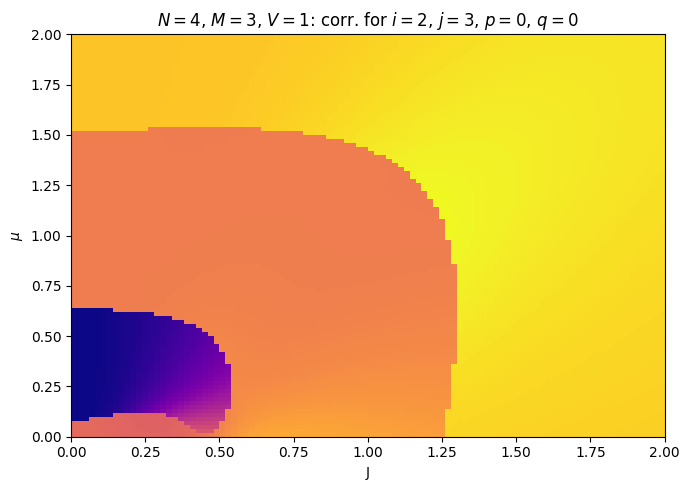

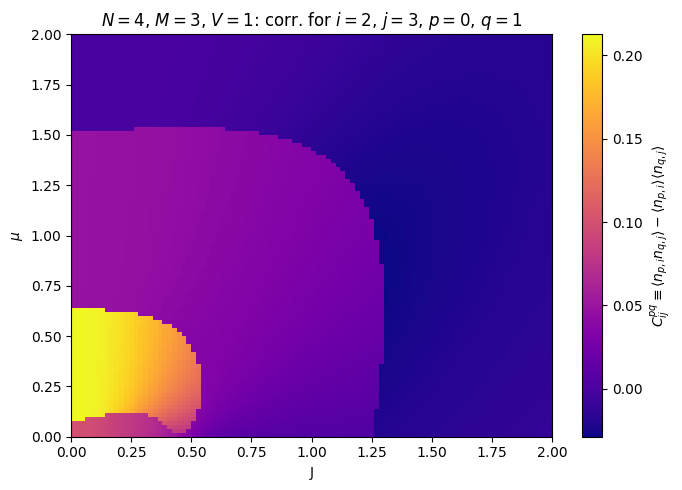

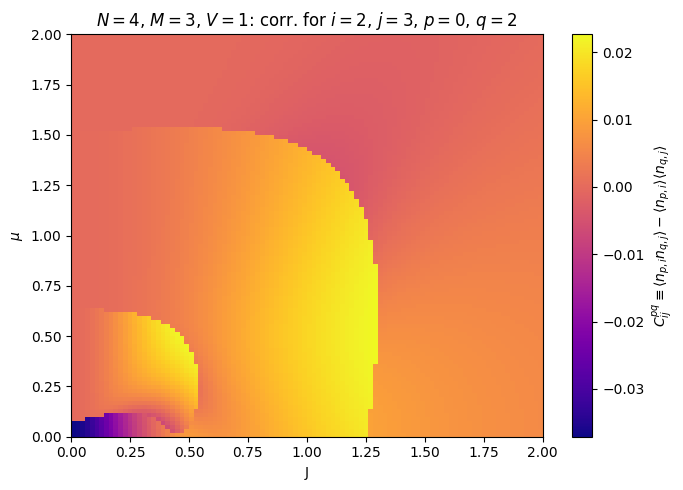

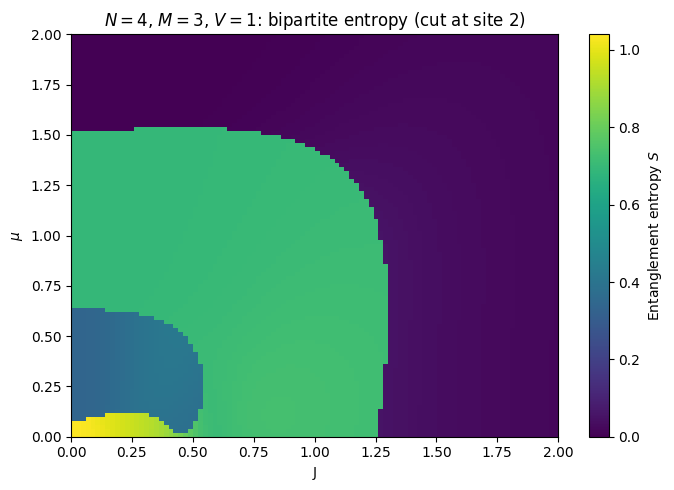

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    same_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={0}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_1_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={1}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_2_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={2}$")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    entropy_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='viridis'
)
fig.colorbar(c, ax=ax, label=r'Entanglement entropy $S$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: bipartite entropy (cut at site {N//2})")
plt.tight_layout()
plt.show()


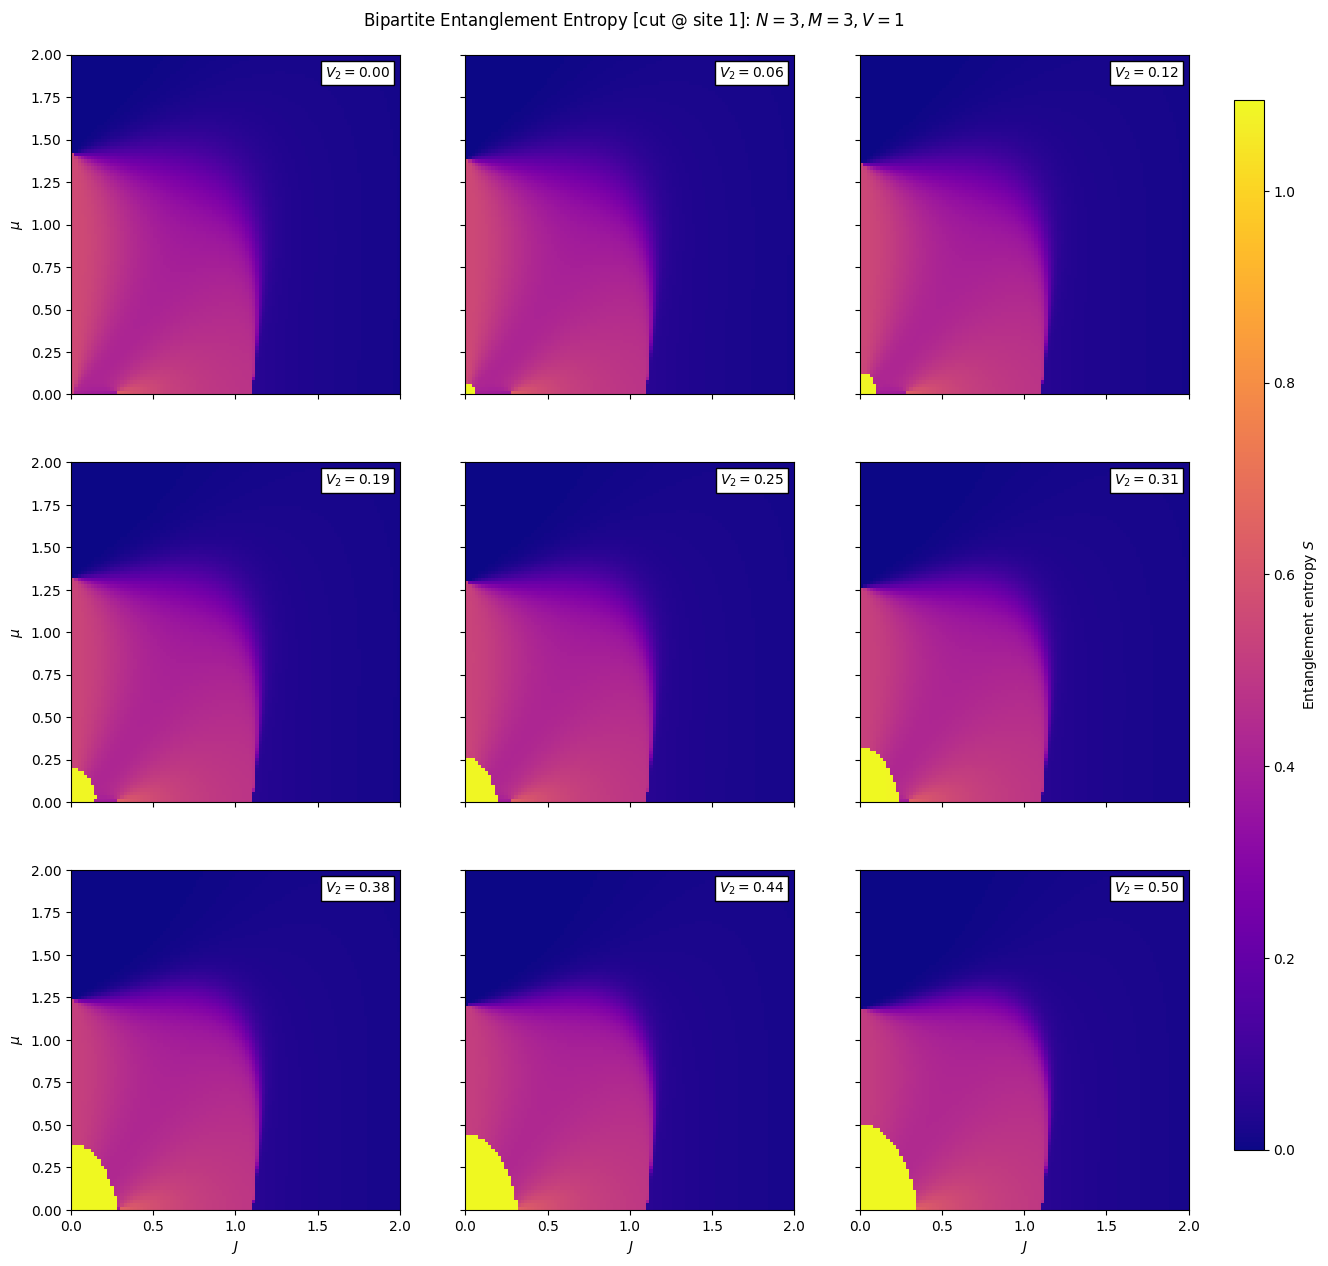

In [8]:
N = 3
M = 3
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.50, 9), 2)

# Step 1: Compute entropy grids for each V2
all_entropy_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    entropy_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)

            entropies = [
                compute_entanglement_entropy(N, M, psi, cut_site=N // 2)
                for psi in degenerate_states
            ]
            entropy_grid[i, j] = np.mean(entropies)

    all_entropy_grids.append(entropy_grid)
    global_min = min(global_min, np.min(entropy_grid))
    global_max = max(global_max, np.max(entropy_grid))

# Step 2: Create subplots and shared colorbar
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    entropy_grid = all_entropy_grids[idx]
    im = ax.imshow(
        entropy_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Entanglement entropy $S$')
fig.suptitle(f"Bipartite Entanglement Entropy [cut @ site {N//2}]: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()


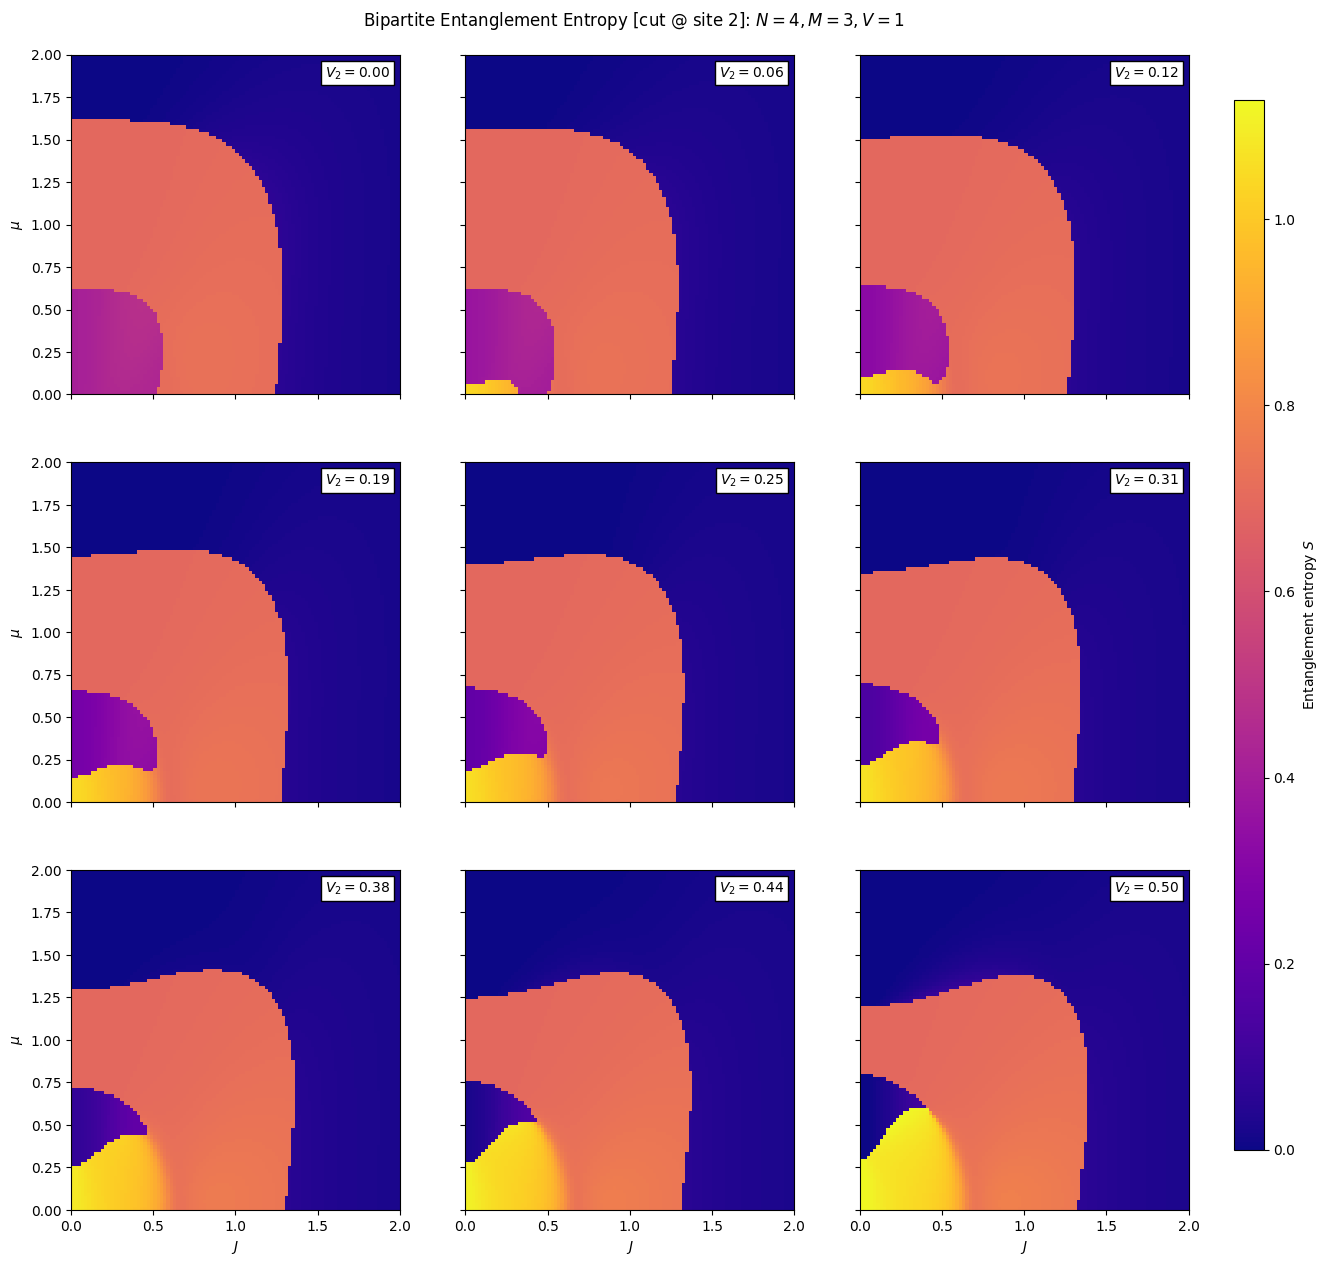

In [9]:
N = 4
M = 3
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.50, 9), 2)

# Step 1: Compute entropy grids for each V2
all_entropy_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    entropy_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
    
            entropies = [
                compute_entanglement_entropy(N, M, psi, cut_site=N // 2)
                for psi in degenerate_states
            ]
            entropy_grid[i, j] = np.mean(entropies)

    all_entropy_grids.append(entropy_grid)
    global_min = min(global_min, np.min(entropy_grid))
    global_max = max(global_max, np.max(entropy_grid))

# Step 2: Create subplots and shared colorbar
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    entropy_grid = all_entropy_grids[idx]
    im = ax.imshow(
        entropy_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Entanglement entropy $S$')
fig.suptitle(f"Bipartite Entanglement Entropy [cut @ site {N//2}]: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()


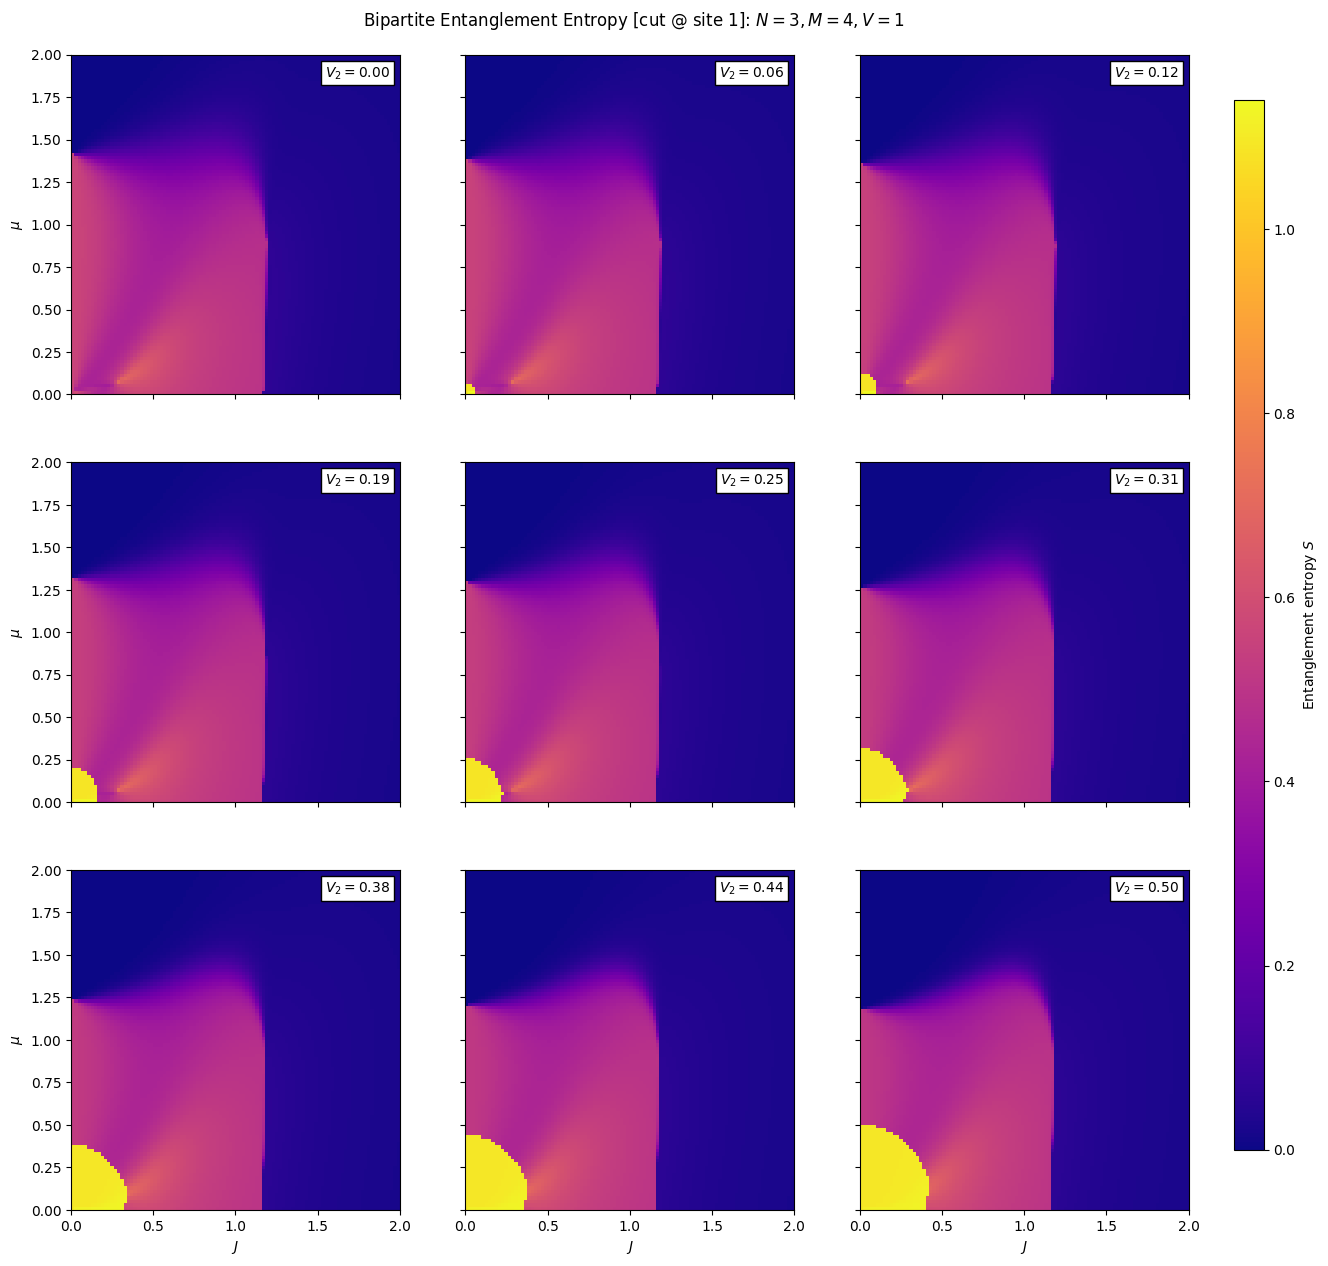

In [2]:
N = 3
M = 4
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.50, 9), 2)

# Step 1: Compute entropy grids for each V2
all_entropy_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    entropy_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)

            entropies = [
                compute_entanglement_entropy(N, M, psi, cut_site=N // 2)
                for psi in degenerate_states
            ]
            entropy_grid[i, j] = np.mean(entropies)

    all_entropy_grids.append(entropy_grid)
    global_min = min(global_min, np.min(entropy_grid))
    global_max = max(global_max, np.max(entropy_grid))

# Step 2: Create subplots and shared colorbar
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    entropy_grid = all_entropy_grids[idx]
    im = ax.imshow(
        entropy_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Entanglement entropy $S$')
fig.suptitle(f"Bipartite Entanglement Entropy [cut @ site {N//2}]: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()


In [4]:
N = 4
M = 4
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 2)
mus = np.linspace(0, 2, 2)

V2_values = np.round(np.linspace(0, 0.50, 9), 2)

# Step 1: Compute entropy grids for each V2
all_entropy_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    entropy_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)

            entropies = [
                compute_entanglement_entropy(N, M, psi, cut_site=N // 2)
                for psi in degenerate_states
            ]
            entropy_grid[i, j] = np.mean(entropies)

    all_entropy_grids.append(entropy_grid)
    global_min = min(global_min, np.min(entropy_grid))
    global_max = max(global_max, np.max(entropy_grid))

# Step 2: Create subplots and shared colorbar
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    entropy_grid = all_entropy_grids[idx]
    im = ax.imshow(
        entropy_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Entanglement entropy $S$')
fig.suptitle(f"Bipartite Entanglement Entropy [cut @ site {N//2}]: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()


KeyboardInterrupt: 

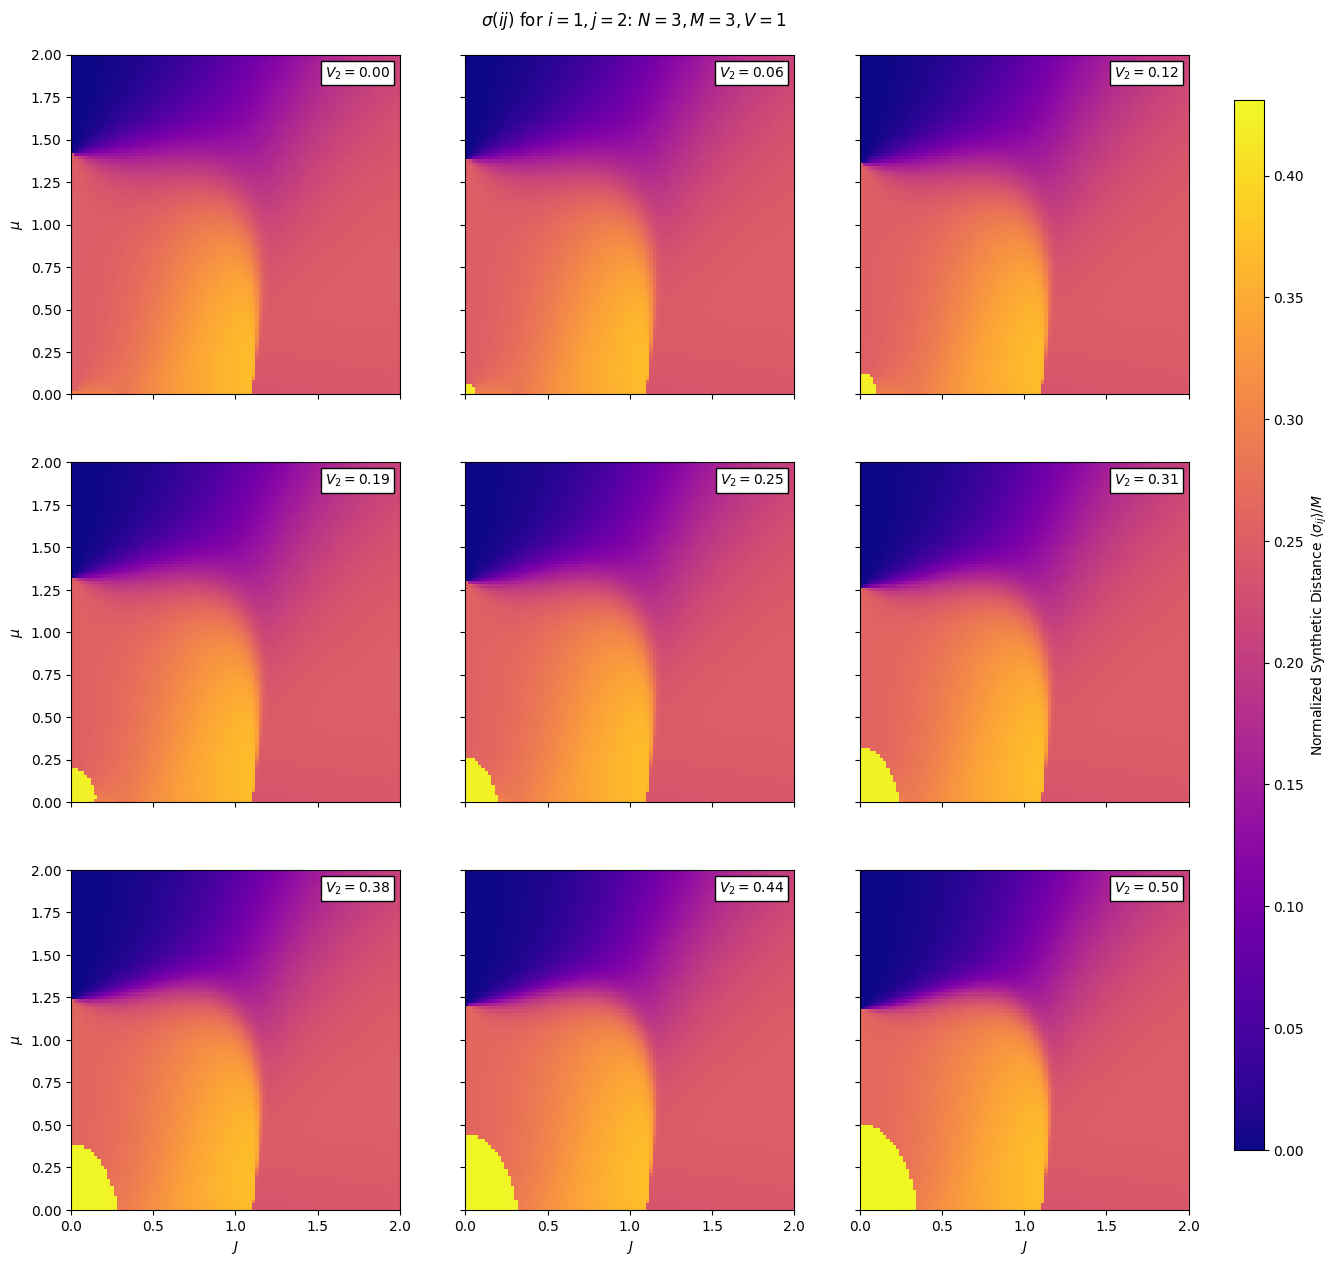

In [10]:
N = 3
M = 3
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.5, 9), 2)

all_sigma_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    sigma_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
            d = len(degenerate_states)
            
            sigma_op = sigma_ij_operator(N//2,N//2+1, states, N, M)
            sigma_exp = np.trace(P*sigma_op) / d

            sigma_grid[i,j] = sigma_exp/M

    all_sigma_grids.append(sigma_grid)
    global_min = min(global_min, np.min(sigma_grid))
    global_max = max(global_max, np.max(sigma_grid))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    sigma_grid = all_sigma_grids[idx]
    im = ax.imshow(
        sigma_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Normalized Synthetic Distance $\langle\sigma_{ij}\rangle/M$')
fig.suptitle(f"$\sigma(ij)$ for $i = {N//2}, j = {N//2+1}$: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()


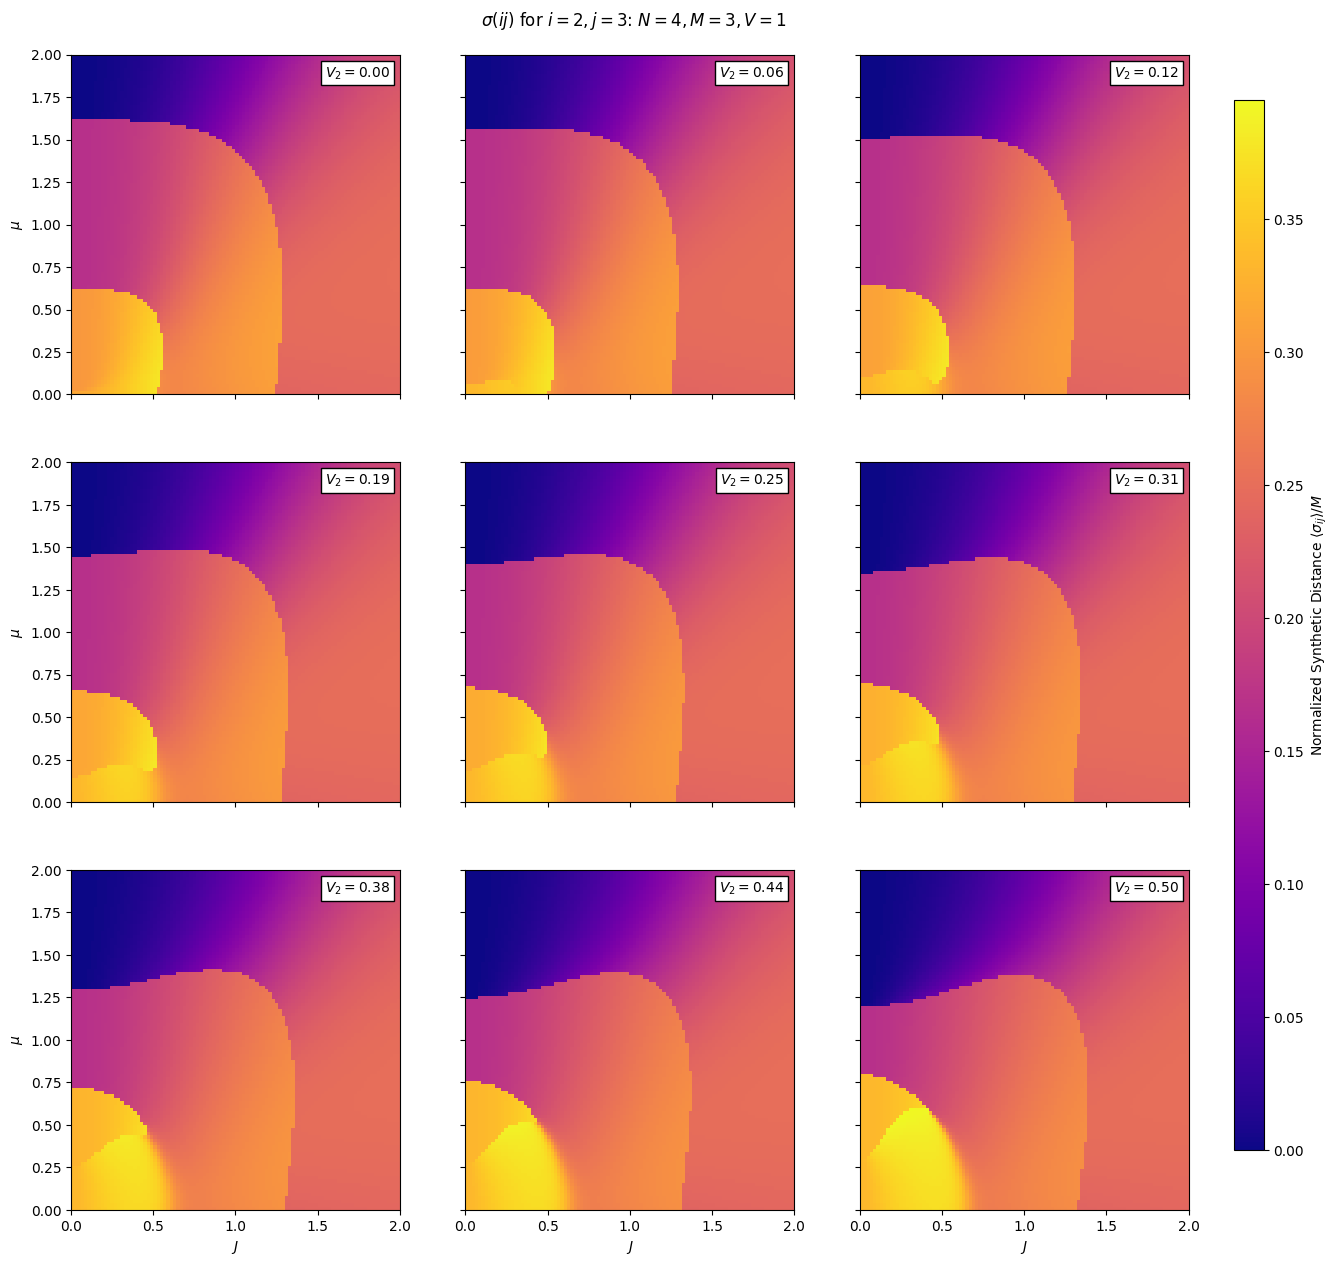

In [11]:
N = 4
M = 3
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.5, 9), 2)

all_sigma_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    sigma_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
            d = len(degenerate_states)
            
            sigma_op = sigma_ij_operator(N//2,N//2+1, states, N, M)
            sigma_exp = np.trace(P*sigma_op) / d

            sigma_grid[i,j] = sigma_exp/M

    all_sigma_grids.append(sigma_grid)
    global_min = min(global_min, np.min(sigma_grid))
    global_max = max(global_max, np.max(sigma_grid))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    sigma_grid = all_sigma_grids[idx]
    im = ax.imshow(
        sigma_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Normalized Synthetic Distance $\langle\sigma_{ij}\rangle/M$')
fig.suptitle(f"$\sigma(ij)$ for $i = {N//2}, j = {N//2+1}$: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()


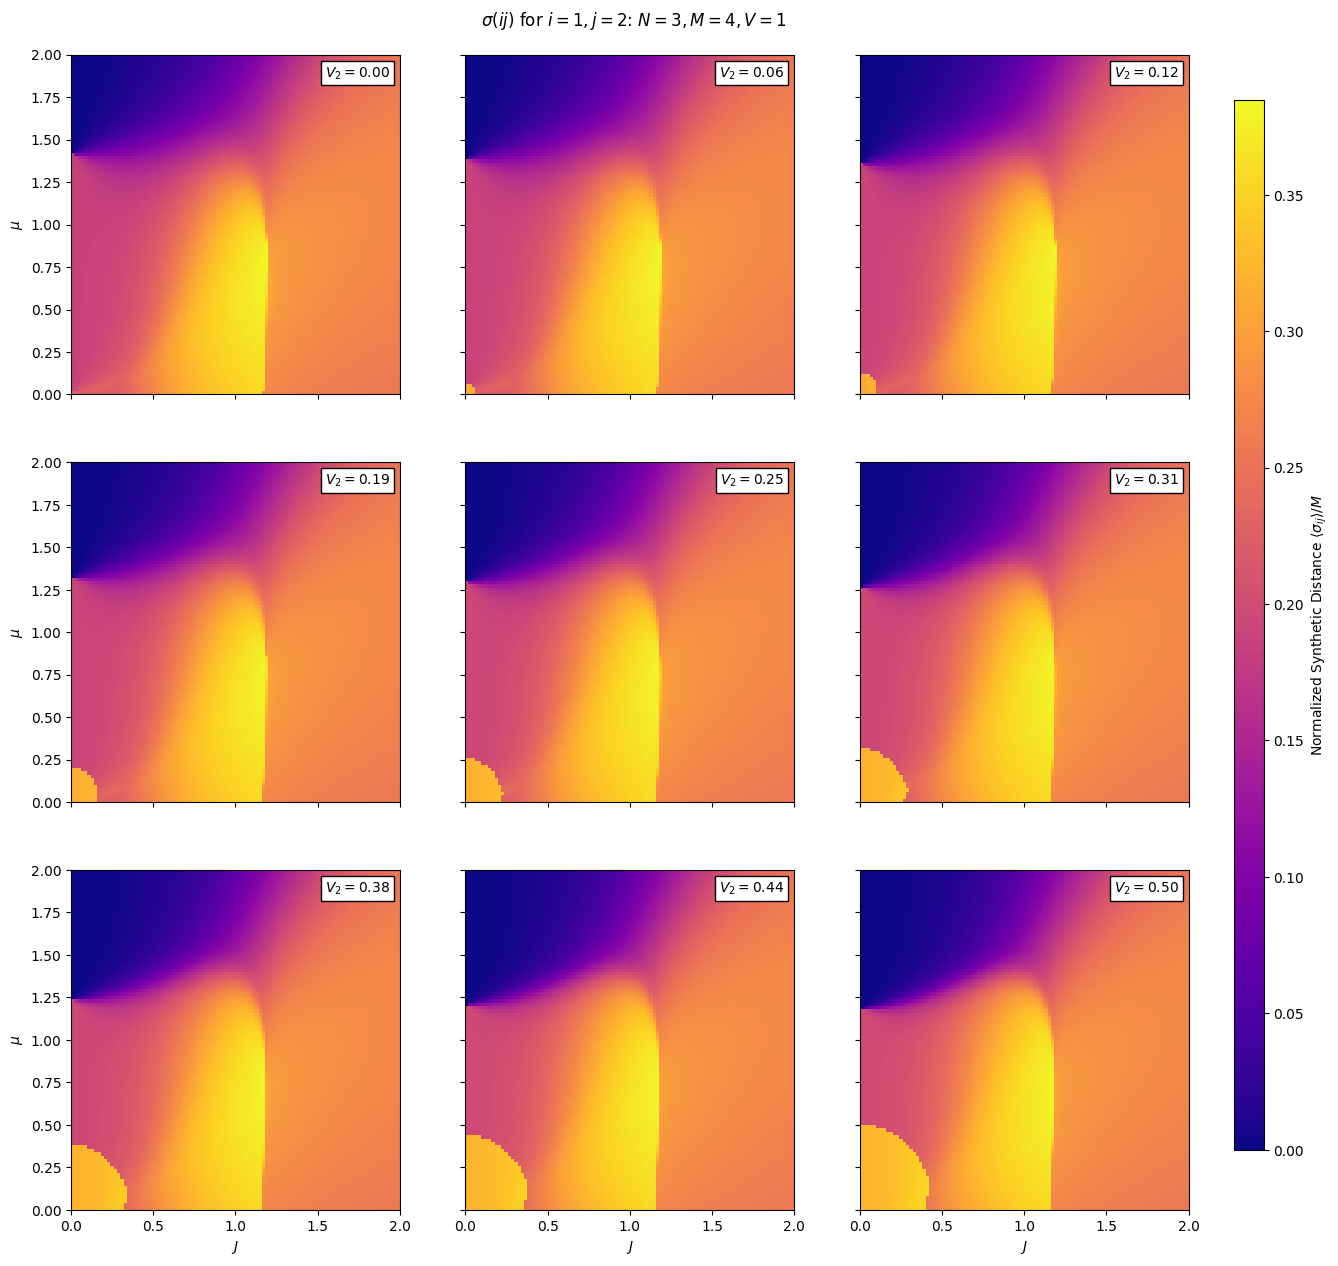

In [12]:
N = 3
M = 4
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.5, 9), 2)

all_sigma_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    sigma_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
            d = len(degenerate_states)
            
            sigma_op = sigma_ij_operator(N//2,N//2+1, states, N, M)
            sigma_exp = np.trace(P*sigma_op) / d

            sigma_grid[i,j] = sigma_exp/M

    all_sigma_grids.append(sigma_grid)
    global_min = min(global_min, np.min(sigma_grid))
    global_max = max(global_max, np.max(sigma_grid))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    sigma_grid = all_sigma_grids[idx]
    im = ax.imshow(
        sigma_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Normalized Synthetic Distance $\langle\sigma_{ij}\rangle/M$')
fig.suptitle(f"$\sigma(ij)$ for $i = {N//2}, j = {N//2+1}$: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()


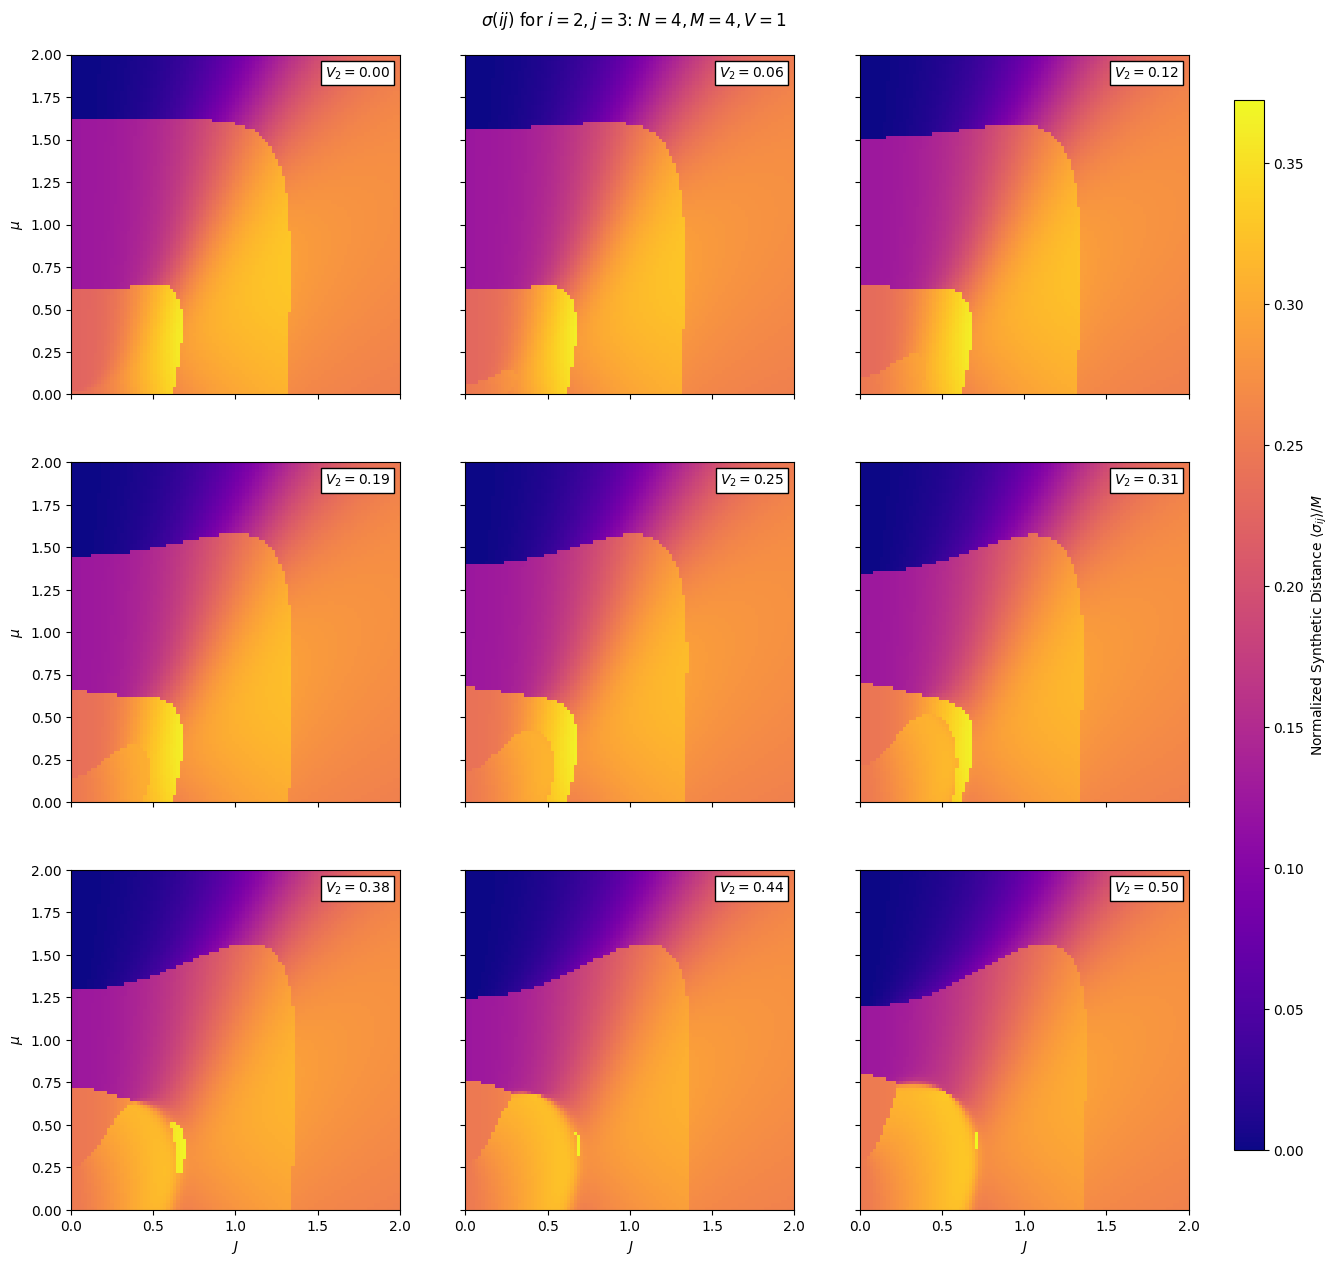

In [13]:
N = 4
M = 4
V = 1
states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 100)
mus = np.linspace(0, 2, 100)

V2_values = np.round(np.linspace(0, 0.5, 9), 2)

all_sigma_grids = []
global_min = float('inf')
global_max = float('-inf')

for V2 in V2_values:
    sigma_grid = np.zeros((len(mus), len(Js)))

    for i, mu in enumerate(mus):
        for j, J in enumerate(Js):
            hamiltonian = construct_nnn_hamiltonian(N, M, V, mu, J, V2=V2)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
            d = len(degenerate_states)
            
            sigma_op = sigma_ij_operator(N//2,N//2+1, states, N, M)
            sigma_exp = np.trace(P*sigma_op) / d

            sigma_grid[i,j] = sigma_exp/M

    all_sigma_grids.append(sigma_grid)
    global_min = min(global_min, np.min(sigma_grid))
    global_max = max(global_max, np.max(sigma_grid))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
fig.subplots_adjust(right=0.87)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # Colorbar axis

for idx, ax in enumerate(axs.flat):
    sigma_grid = all_sigma_grids[idx]
    im = ax.imshow(
        sigma_grid,
        origin='lower',
        aspect='auto',
        extent=[Js[0], Js[-1], mus[0], mus[-1]],
        cmap='plasma',
        vmin=global_min,
        vmax=global_max,
    )
    ax.text(
    0.97, 0.97,
    f"$V_2 = {V2_values[idx]:.2f}$",
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10,
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
)


    if idx % 3 == 0:
        ax.set_ylabel("$\mu$")
    if idx // 3 == 2:
        ax.set_xlabel("$J$")

fig.colorbar(im, cax=cbar_ax, label=r'Normalized Synthetic Distance $\langle\sigma_{ij}\rangle/M$')
fig.suptitle(f"$\sigma(ij)$ for $i = {N//2}, j = {N//2+1}$: $N = {N}, M = {M}, V = {V}$", y=0.91)

plt.show()
